In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [135]:
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import kpss , adfuller
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose

In [13]:
data=pd.read_csv(r"C:\Users\abhin\TS Lab\Datasets\wind_dataset.csv")
data["DATE"]=pd.to_datetime(data["DATE"])
data=data.set_index("DATE")

In [14]:
dicti={"Wind_Rate":data["WIND"] , "Max_Temp" : data["T.MAX"]}
df=pd.DataFrame(dicti)

In [35]:
temp=pd.date_range(start="01-01-2023",end="30-12-2023")

C:\Users\abhin\AppData\Local\Temp\ipykernel_1920\4173696737.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  temp=pd.date_range(start="01-01-2023",end="30-12-2023")


In [68]:
plot_acf(df["Wind_Rate"],lags=40)
plot_pacf(df["Wind_Rate"],lags=40)

In [69]:
print(grangercausalitytests(df[["Wind_Rate","Max_Temp"]],2))

In [71]:
train=df.iloc[:5000,:]
test=df.iloc[5000:,:]

In [74]:
#Multi-Variate
var_model=VARMAX(train,order=(5,0),enforce_stationary=True).fit()
preds=var_model.get_prediction()
preds.columns=["Wind_Rate","Max_Temp"]
prediction=preds.predicted_mean

D:\PYTHON\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


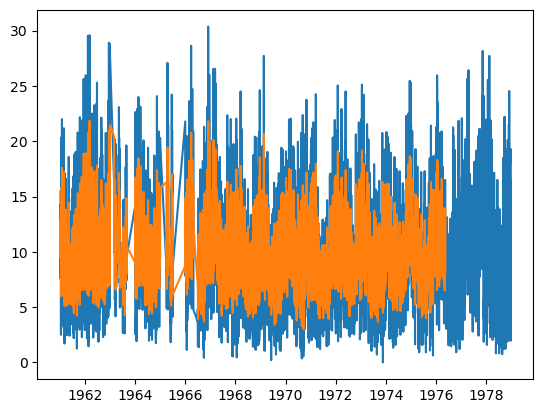

In [87]:
plt.plot(df["Wind_Rate"])
plt.plot(prediction["Wind_Rate"])
plt.show()

In [96]:
#Finding the Maximum at every year (Minimum-min(),Mean-mean())
downsampled=df["Wind_Rate"].resample("Y").max()

In [99]:
#Rolling and Expanding Means
expanding_mean = df["Wind_Rate"].expanding().mean()
rolling_mean = df["Wind_Rate"].rolling(3).mean()

In [107]:
#Lag-Based-Features
one_lag=df["Wind_Rate"].shift(1)

In [109]:
#interpolation_wind_rate
upsampled=df["Wind_Rate"].resample("60min").asfreq()
interpolated=upsampled.interpolate(method="linear")
interpolated

In [116]:
#ARMA
arma_202 = ARIMA(train.iloc[:,:1],order=(2,0,2)).fit()
pred_arma=arma_202.predict()
#For ARIMA Convert the order as (2,1,2) or best order sestimated from the auto_arima model using aic , bqic

D:\PYTHON\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\PYTHON\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\PYTHON\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [127]:
#SARIMA
sarima202 = SARIMAX(train.iloc[:,:1],order=(1,0,1),seasonal_order=(1,0,1,24)).fit()
pred_seasonal=sarima202.predict()

D:\PYTHON\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\PYTHON\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [133]:
#auto_arima for finding the best order of the model
model=auto_arima(train.iloc[:,:1],m=12,start_P=0,start_Q=0,max_P=3,max_Q=3)


In [134]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5000
Model:               SARIMAX(1, 1, 3)   Log Likelihood              -13980.776
Date:                Mon, 29 Apr 2024   AIC                          27971.551
Time:                        20:20:39   BIC                          28004.136
Sample:                             0   HQIC                         27982.972
                               - 5000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5285      0.054      9.758      0.000       0.422       0.635
ma.L1         -0.9573      0.056    -17.061      0.000      -1.067      -0.847
ma.L2         -0.0601      0.030     -2.018      0.044      -0.118      -0.002
ma.L3          0.0496      0.030      1.660      0.097      -0.009       0.108
sigma2        15.7244      0.286     55.045      0.000      15.164      16.284
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               226.22
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                             0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [139]:
decomposition=seasonal_decompose(train["Wind_Rate"],model="additive",period=365)

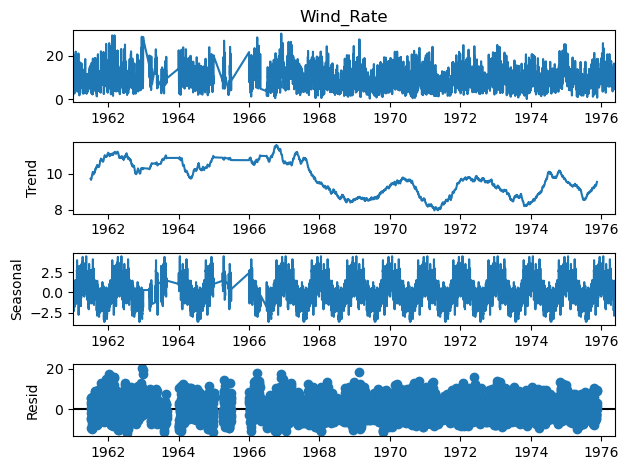

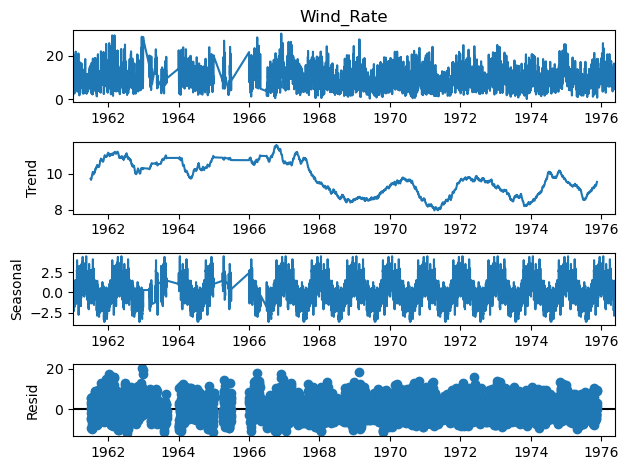

In [148]:
decomposition.plot()